In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\Praveen\OneDrive\Desktop\weather_prediction\Notebook_Experiments\Data\usa_rain_prediction_dataset_2024_2025.csv')

df.head()


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [4]:
df.drop('Date', axis=1, inplace=True)

In [5]:
df


,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...
73095,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [6]:
df.columns  


Index(['Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')

In [7]:
# Shows the count of null values in each column
print(df.isnull().sum())

Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64


In [8]:
# Shows a summary table with counts and nulls
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       73100 non-null  object 
 1   Temperature    73100 non-null  float64
 2   Humidity       73100 non-null  float64
 3   Wind Speed     73100 non-null  float64
 4   Precipitation  73100 non-null  float64
 5   Cloud Cover    73100 non-null  float64
 6   Pressure       73100 non-null  float64
 7   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 4.5+ MB
None


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(73100, 8)

In [11]:
cat_cols=['Location']
num_cols=['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Pressure']



In [12]:
print(cat_cols)

['Location']


In [13]:
df[cat_cols].value_counts()

Location       
Austin             3655
Charlotte          3655
Chicago            3655
Columbus           3655
Dallas             3655
Denver             3655
Fort Worth         3655
Houston            3655
Indianapolis       3655
Jacksonville       3655
Los Angeles        3655
New York           3655
Philadelphia       3655
Phoenix            3655
San Antonio        3655
San Diego          3655
San Francisco      3655
San Jose           3655
Seattle            3655
Washington D.C.    3655
Name: count, dtype: int64

In [14]:
#one-hot encoding
df_pandas_encoded = pd.get_dummies(df, columns=cat_cols,drop_first=True)

In [15]:
print(df_pandas_encoded.shape)


(73100, 26)


In [16]:
print(df_pandas_encoded)

       Temperature   Humidity  Wind Speed  Precipitation  Cloud Cover  \
0        87.524795  75.655455   28.379506       0.000000    69.617966   
1        83.259325  28.712617   12.436433       0.526995    41.606048   
2        80.943050  64.740043   14.184831       0.916884    77.364763   
3        78.097552  59.738984   19.444029       0.094134    52.541196   
4        37.059963  34.766784    3.689661       1.361272    85.584000   
...            ...        ...         ...            ...          ...   
73095    40.614393  65.099438   28.778327       0.000000    54.168514   
73096    52.641643  30.610525   12.282890       0.871000    22.068055   
73097    56.492591  96.740232    2.894762       1.191956    52.336048   
73098    65.748956  63.900004   24.632400       0.483421    76.785280   
73099    54.648609  80.812021   22.722505       0.151903    19.674960   

          Pressure  Rain Tomorrow  Location_Charlotte  Location_Chicago  \
0      1026.030278              0               

In [17]:
len(df_pandas_encoded.columns)

26

In [18]:
df_pandas_encoded.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Pressure', 'Rain Tomorrow', 'Location_Charlotte', 'Location_Chicago',
       'Location_Columbus', 'Location_Dallas', 'Location_Denver',
       'Location_Fort Worth', 'Location_Houston', 'Location_Indianapolis',
       'Location_Jacksonville', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Francisco', 'Location_San Jose',
       'Location_Seattle', 'Location_Washington D.C.'],
      dtype='object')

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[cat_cols])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(cat_cols))

df_sklearn_encoded = pd.concat([df.drop(cat_cols, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data :\n{df_sklearn_encoded}\n")

One-Hot Encoded Data :
       Temperature   Humidity  Wind Speed  Precipitation  Cloud Cover  \
0        87.524795  75.655455   28.379506       0.000000    69.617966   
1        83.259325  28.712617   12.436433       0.526995    41.606048   
2        80.943050  64.740043   14.184831       0.916884    77.364763   
3        78.097552  59.738984   19.444029       0.094134    52.541196   
4        37.059963  34.766784    3.689661       1.361272    85.584000   
...            ...        ...         ...            ...          ...   
73095    40.614393  65.099438   28.778327       0.000000    54.168514   
73096    52.641643  30.610525   12.282890       0.871000    22.068055   
73097    56.492591  96.740232    2.894762       1.191956    52.336048   
73098    65.748956  63.900004   24.632400       0.483421    76.785280   
73099    54.648609  80.812021   22.722505       0.151903    19.674960   

          Pressure  Rain Tomorrow  Location_Austin  Location_Charlotte  \
0      1026.030278        

In [21]:
df_sklearn_encoded.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Pressure', 'Rain Tomorrow', 'Location_Austin', 'Location_Charlotte',
       'Location_Chicago', 'Location_Columbus', 'Location_Dallas',
       'Location_Denver', 'Location_Fort Worth', 'Location_Houston',
       'Location_Indianapolis', 'Location_Jacksonville',
       'Location_Los Angeles', 'Location_New York', 'Location_Philadelphia',
       'Location_Phoenix', 'Location_San Antonio', 'Location_San Diego',
       'Location_San Francisco', 'Location_San Jose', 'Location_Seattle',
       'Location_Washington D.C.'],
      dtype='object')

In [22]:
df_sklearn_encoded = df_sklearn_encoded.drop('Location_Austin', axis=1)

In [23]:
df_sklearn_encoded.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover',
       'Pressure', 'Rain Tomorrow', 'Location_Charlotte', 'Location_Chicago',
       'Location_Columbus', 'Location_Dallas', 'Location_Denver',
       'Location_Fort Worth', 'Location_Houston', 'Location_Indianapolis',
       'Location_Jacksonville', 'Location_Los Angeles', 'Location_New York',
       'Location_Philadelphia', 'Location_Phoenix', 'Location_San Antonio',
       'Location_San Diego', 'Location_San Francisco', 'Location_San Jose',
       'Location_Seattle', 'Location_Washington D.C.'],
      dtype='object')

In [24]:

print(f"One-Hot Encoded Data :\n{df_sklearn_encoded}\n")

One-Hot Encoded Data :
       Temperature   Humidity  Wind Speed  Precipitation  Cloud Cover  \
0        87.524795  75.655455   28.379506       0.000000    69.617966   
1        83.259325  28.712617   12.436433       0.526995    41.606048   
2        80.943050  64.740043   14.184831       0.916884    77.364763   
3        78.097552  59.738984   19.444029       0.094134    52.541196   
4        37.059963  34.766784    3.689661       1.361272    85.584000   
...            ...        ...         ...            ...          ...   
73095    40.614393  65.099438   28.778327       0.000000    54.168514   
73096    52.641643  30.610525   12.282890       0.871000    22.068055   
73097    56.492591  96.740232    2.894762       1.191956    52.336048   
73098    65.748956  63.900004   24.632400       0.483421    76.785280   
73099    54.648609  80.812021   22.722505       0.151903    19.674960   

          Pressure  Rain Tomorrow  Location_Charlotte  Location_Chicago  \
0      1026.030278       

In [25]:
df.drop(cat_cols, axis=1,inplace=True)

In [26]:
df_sklearn_encoded

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Location_Charlotte,Location_Chicago,Location_Columbus,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73096,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73097,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73098,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...
73095,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [28]:
data_df=df_sklearn_encoded

In [29]:
data_df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Location_Charlotte,Location_Chicago,Location_Columbus,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73096,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73097,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73098,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale the numerical columns (excluding the one-hot encoded columns)
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover']
data_df_scaled = pd.DataFrame(scaler.fit_transform(data_df[numerical_columns]), 
                             columns=numerical_columns)

# Combine the scaled numerical columns with the one-hot encoded columns
final_df = pd.concat([data_df_scaled, data_df.drop(numerical_columns, axis=1)], axis=1)

In [31]:
final_df

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow,Location_Charlotte,Location_Chicago,Location_Columbus,...,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Francisco,Location_San Jose,Location_Seattle,Location_Washington D.C.
0,0.635909,0.393843,0.881221,-0.292507,0.323921,1026.030278,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.513890,-0.778694,-0.176952,0.490341,-0.297271,995.962065,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.447631,0.121198,-0.060907,1.069519,0.495714,980.796739,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.366232,-0.003718,0.288156,-0.152671,-0.054773,979.012163,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.807692,-0.627473,-0.757492,1.729654,0.677984,1031.790859,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,-0.706014,0.130175,0.907691,-0.292507,-0.018686,977.083747,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73096,-0.361961,-0.731288,-0.187143,1.001358,-0.730545,980.591675,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73097,-0.251801,0.920498,-0.810251,1.478136,-0.059322,1016.469174,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73098,0.012987,0.100216,0.632518,0.425611,0.482864,1032.396146,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
dependent_feature=final_df['Rain Tomorrow']

In [33]:
dependent_feature

0        0
1        0
2        1
3        0
4        0
        ..
73095    0
73096    0
73097    1
73098    1
73099    0
Name: Rain Tomorrow, Length: 73100, dtype: int64

In [34]:
independent_feature=final_df.drop('Rain Tomorrow', axis=1)

In [35]:
independent_feature_df=independent_feature

In [36]:


dependent_feature_df=dependent_feature

In [37]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    independent_feature_df, 
    dependent_feature_df, 
    test_size=0.3, 
    random_state=42
)

In [38]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

c:\Users\Praveen\anaconda3\envs\weather_prediction_py_3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [39]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(21930,))

In [41]:
from joblib import dump

# Save the model
dump(model, 'weather_prediction_model.joblib')

['weather_prediction_model.joblib']

<Figure size 800x600 with 0 Axes>

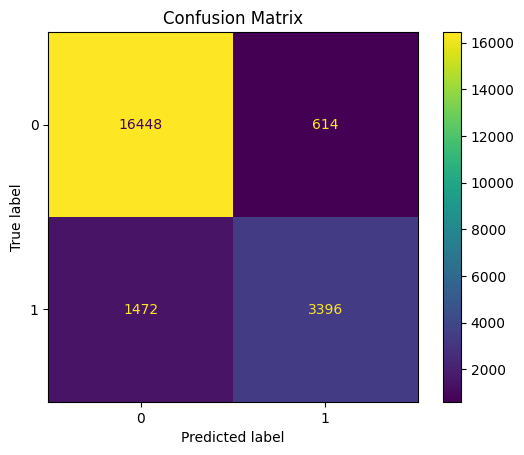

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.metrics import fbeta_score

# Calculate F2 score
f2 = fbeta_score(y_test, y_pred, beta=2)

print("F2 Score:", f2)

F2 Score: 0.7231070607273656
